In [75]:
%matplotlib inline
import numpy as np
from scipy import stats
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from statsmodels.distributions.mixture_rvs import mixture_rvs

In [76]:
# Location, scale and weight for the two distributions
dist1_loc, dist1_scale, weight1 = -1 , .25, 0.25
dist2_loc, dist2_scale, weight2 = 1 , .5, 0.75

# Sample from a mixture of distributions
sample = mixture_rvs(prob=[weight1, weight2], size=250,
                        dist=[stats.norm, stats.norm],
                        kwargs = (dict(loc=dist1_loc, scale=dist1_scale),
                                  dict(loc=dist2_loc, scale=dist2_scale)))

In [91]:
# create x_axis range
X_plot = np.linspace(-3,3, 1000)
#the true distribution
true_values = (stats.norm.pdf(loc=dist1_loc, scale=dist1_scale, x=X_plot)*weight1
              + stats.norm.pdf(loc=dist2_loc, scale=dist2_scale, x=X_plot)*weight2)

KDE with Gaussian Kernel and different bandwidth

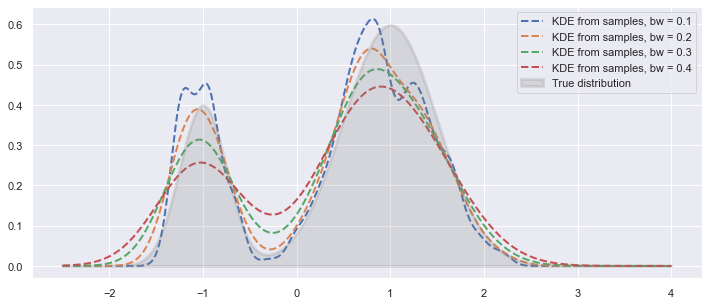

In [95]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Plot the KDE for various bandwidths
for bandwidth in [0.1, 0.2,0.3, 0.4]:
    kde = KernelDensity(kernel='gaussian',bandwidth=bandwidth)
    kde.fit(sample[:, None]) # Estimate the densities
    score =kde.score_samples(X_plot[:, None])
    ax.plot(X_plot, np.exp(score), '--', lw=2, zorder=10,label='KDE from samples, bw = {}'.format(round(bandwidth, 2)))

# Plot the true distribution
ax.fill_between(X_plot, true_values, lw=3, color='grey',alpha=0.2, label='True distribution', zorder=15)

ax.legend(loc='best')
ax.grid(True, zorder=-5)

The scikit-learn library allows the tuning of the bandwidth parameter via cross-validation and returns the parameter value that maximizes the log-likelihood of data. The function we can use to achieve this is GridSearchCV(), which requires different values of the bandwidth parameter. The best model can be retrieved by using the best_estimator_ field of the GridSearchCV object.

In [106]:
bandwidth = np.arange(0.05, 2, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(sample[:, None])
kde = grid.best_estimator_
optimal_bw=kde.bandwidth
print("optimal bandwidth: " + "{:.2f}".format(optimal_bw))

optimal bandwidth: 0.15


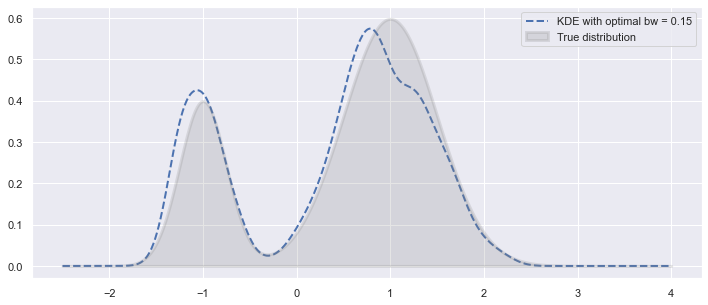

In [107]:
# Plot the KDE for optimal bandwidth
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
score =kde.score_samples(X_plot[:, None])
ax.plot(X_plot, np.exp(score), '--', lw=2, zorder=10,label='KDE with optimal bw = {}'.format(round(kde.bandwidth, 2)))

ax.fill_between(X_plot, true_values, lw=3, color='grey',alpha=0.2, label='True distribution', zorder=15)

ax.legend(loc='best')
ax.grid(True, zorder=-5)

In the example above, a Gaussian kernel was used. Several other kernels are also available.

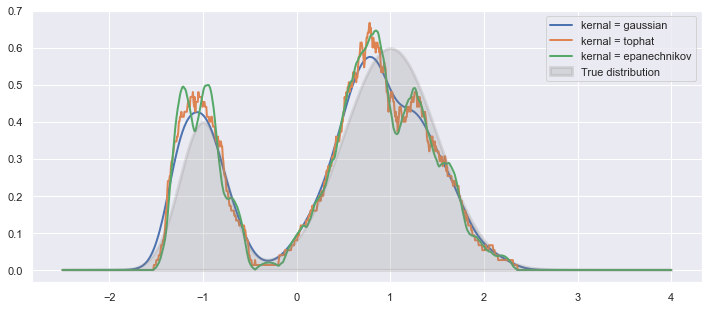

In [119]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)

# Plot the KDE for various kernels using optimal bandwidth
for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde1 = KernelDensity(kernel=kernel,bandwidth=optimal_bw)
    kde1.fit(sample[:, None]) # Estimate the densities
    score =kde1.score_samples(X_plot[:, None])
    ax.plot(X_plot, np.exp(score), '-', lw=2, zorder=10,label='kernal = {}'.format(kernel))

# Plot the true distribution    
ax.fill_between(X_plot, true_values, lw=3, color='grey',alpha=0.2, label='True distribution', zorder=15)

ax.legend(loc='best')
ax.grid(True, zorder=-5)